###Creación de modelo

In [ ]:
!pip install tensorflowjs
!pip install --upgrade tensorflow tensorflowjs
!pip install -q scikit-plot

In [6]:
#importan librerias

#Librerias base
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import os
import cv2
import scikitplot as skplt

from glob import glob
#Librerias de modelado
import tensorflow as tf
import tensorflowjs as tfjs
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.applications import VGG16

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

In [7]:
#Funcion para leer las imagenes de un folder
def load_folder_with_label(folder_path,label, size = (128,128)):
  files = glob(os.path.join(folder_path,"*"))
  X = list(map(plt.imread, files))
  X = [cv2.resize(img,size) for img in X]
  y = [label] * len(X)
  return X,y

In [8]:
image_size = (128,128)

In [9]:
#Cargamos los datos de entrenamiento de la clase 0 y clase 1
X_0, y_0 = load_folder_with_label("/Users/manuel/Documents/Python/project_mna/data/train/ok_images_train", 1, size = image_size)
X_1, y_1 = load_folder_with_label("/Users/manuel/Documents/Python/project_mna/data/train/nok_images_train", 0, size = image_size)
X = X_0 + X_1
y = y_0 + y_1
del X_0 , X_1, y_0 , y_1

In [10]:
#Cargamos los datos de validacion de la clase 0 y clase 1
X_validation_0, y_validation_0 = load_folder_with_label("/Users/manuel/Documents/Python/project_mna/data/validation/ok_images_val", 1, size = image_size)
X_validation_1, y_validation_1 = load_folder_with_label("/Users/manuel/Documents/Python/project_mna/data/validation/nok_images_val", 0, size = image_size)
X_validation = X_validation_0 + X_validation_1
y_validation = y_validation_0 + y_validation_1
del X_validation_0 , X_validation_1, y_validation_0 , y_validation_1

In [11]:
#Cargamos los datos de test de la clase 0 y clase 1
X_test_0, y_test_0 = load_folder_with_label("/Users/manuel/Documents/Python/project_mna/data/test/ok_images_test", 1, size = image_size)
X_test_1, y_test_1 = load_folder_with_label("/Users/manuel/Documents/Python/project_mna/data/test/nok_images_test", 0, size = image_size)
X_test = X_test_0 + X_test_1
y_test = y_test_0 + y_test_1
del X_test_0 , X_test_1, y_test_0 , y_test_1

In [12]:
#codificamos la target
lbl = LabelEncoder()
lbl.fit(y + y_validation + y_test)

LabelEncoder()

In [13]:
y = lbl.transform(y)
y_validation = lbl.transform(y_validation)
y_test = lbl.transform(y_test)
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

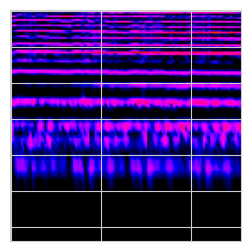

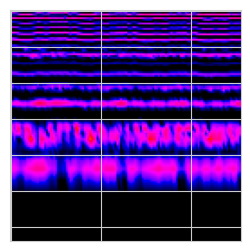

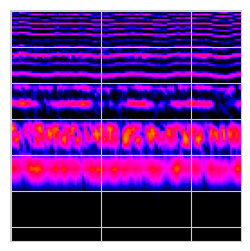

In [14]:
#Vistazo a nuestro dataset
for img in X[:3]:
  plt.figure(figsize = (3,3))
  plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
  plt.imshow(img, cmap = "gray")
  plt.show()

In [15]:
X = np.array(X)
X_validation = np.array(X_validation)
X_test = np.array(X_test)

In [16]:
X.shape

(563, 128, 128, 4)

In [17]:
X_train = X
y_train = y

In [18]:
y.shape

(563,)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

# Create the sequential model
model = Sequential()

# Explicit Input layer
model.add(Input(shape=(128, 128, 4)))

# First layer
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
model.add(Flatten())

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(16, activation='relu'))

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model (add this if you're ready to specify the loss function and optimizer)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary to verify the architecture
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 829,233 (3.16 MB)

 Trainable params: 829,233 (3.16 MB)

 Non-trainable params: 0 (0.00 B)

In [88]:
"""
# Crear el modelo secuencial
model = Sequential()

#Primer capa
model.add(Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=(128, 128, 4)))
model.add(MaxPooling2D(pool_size=(2,2)))

#Segunda capa
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Tercera capa
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Aplanamiento
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(16, activation='relu'))


# Capa densa de salida con una neurona y activación 'sigmoid' para clasificación binaria
model.add(Dense(1, activation='sigmoid'))
"""

"\n# Crear el modelo secuencial\nmodel = Sequential()\n\n#Primer capa\nmodel.add(Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=(128, 128, 4)))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\n\n#Segunda capa\nmodel.add(Conv2D(32, kernel_size=(3,3), activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\n\n#Tercera capa\nmodel.add(Conv2D(64, kernel_size=(3,3), activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\n\n#Aplanamiento\nmodel.add(Flatten())\n\nmodel.add(Dense(64, activation='relu'))\nmodel.add(Dropout(0.25))\nmodel.add(Dense(32, activation='relu'))\nmodel.add(Dropout(0.25))\nmodel.add(Dense(16, activation='relu'))\n\n\n# Capa densa de salida con una neurona y activación 'sigmoid' para clasificación binaria\nmodel.add(Dense(1, activation='sigmoid'))\n"

In [20]:
class_weights = {0: 1.5, 1: 1.0}

# Entrenar el modelo con los datos de entrenamiento y validar con los datos de prueba

history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_validation, y_validation), class_weight=class_weights)

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.5371 - loss: 0.8954 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.4917 - loss: 0.8455 - val_accuracy: 0.5000 - val_loss: 0.6810
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.5000 - loss: 0.8243 - val_accuracy: 0.5000 - val_loss: 0.6384
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.5199 - loss: 0.7798 - val_accuracy: 0.5375 - val_loss: 0.6071
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.5166 - loss: 0.7443 - val_accuracy: 0.6438 - val_loss: 0.5949
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.5668 - loss: 0.7543 - val_accuracy: 0.6938 - val_loss: 0.5888
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.5837 - loss: 0.7447 - val_accuracy: 0.7125 - val_loss: 0.6012
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.6260 - loss: 0.7422 - val_accuracy: 0.5750 - v

In [21]:
!mkdir model

In [22]:
# Saving the model in TensorFlow/Keras
model.save("model/model.h5")  # Saves as HDF5 file

###Gráficas:

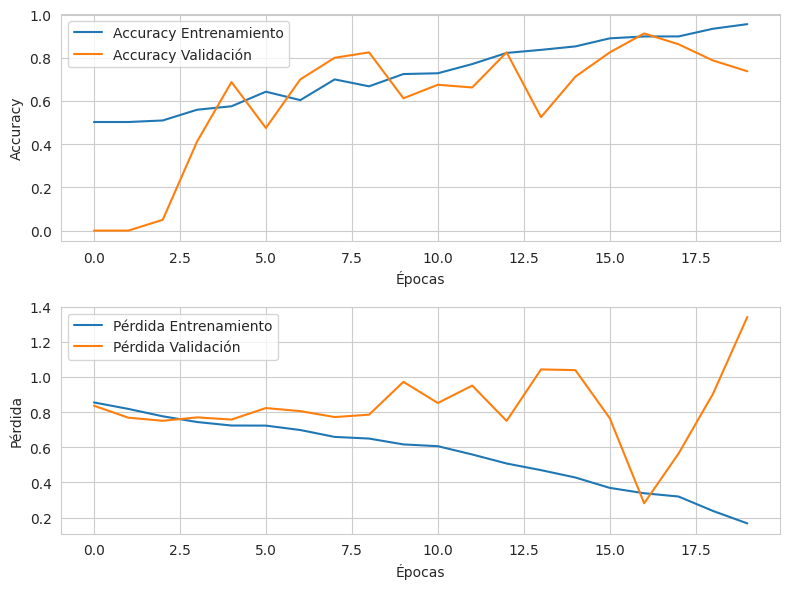

In [20]:
# Obtén los datos del historial
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Crea la figura y los subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Gráfica de accuracy
ax1.plot(accuracy, label='Accuracy Entrenamiento')
ax1.plot(val_accuracy, label='Accuracy Validación')
ax1.set_xlabel('Épocas')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Gráfica de pérdida
ax2.plot(loss, label='Pérdida Entrenamiento')
ax2.plot(val_loss, label='Pérdida Validación')
ax2.set_xlabel('Épocas')
ax2.set_ylabel('Pérdida')
# plt.ylim(None,.8)
ax2.legend()

# Ajusta los márgenes y espacios entre subplots
plt.tight_layout()

# Muestra las gráficas
plt.show()

In [21]:
y_proba_train = model.predict(X_train)
y_pred_train = y_proba_train.round().astype(int)
y_proba_test = model.predict(X_test)
y_pred_test = y_proba_test.round().astype(int)
y_proba_validation = model.predict(X_validation)
y_pred_validation = y_proba_validation.round().astype(int)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


In [22]:
lbl = LabelEncoder()
target_names = ['class 1', 'class 0']
#Class 0 = NOK
#Class 1 = OK

In [23]:
print("Train sample \n", classification_report(y_train, y_pred_train, target_names = target_names))
print("Validation sample \n", classification_report(y_validation, y_pred_validation, target_names = target_names))
print("Test sample \n", classification_report(y_test, y_pred_test, target_names = target_names))

Train sample 
               precision    recall  f1-score   support

     class 1       0.93      1.00      0.96       283
     class 0       1.00      0.93      0.96       280

    accuracy                           0.96       563
   macro avg       0.96      0.96      0.96       563
weighted avg       0.96      0.96      0.96       563

Validation sample 
               precision    recall  f1-score   support

     class 1       0.00      0.00      0.00         0
     class 0       1.00      0.74      0.85        80

    accuracy                           0.74        80
   macro avg       0.50      0.37      0.42        80
weighted avg       1.00      0.74      0.85        80

Test sample 
               precision    recall  f1-score   support

     class 1       0.62      0.65      0.63        40
     class 0       0.63      0.60      0.62        40

    accuracy                           0.62        80
   macro avg       0.63      0.62      0.62        80
weighted avg       0.63  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


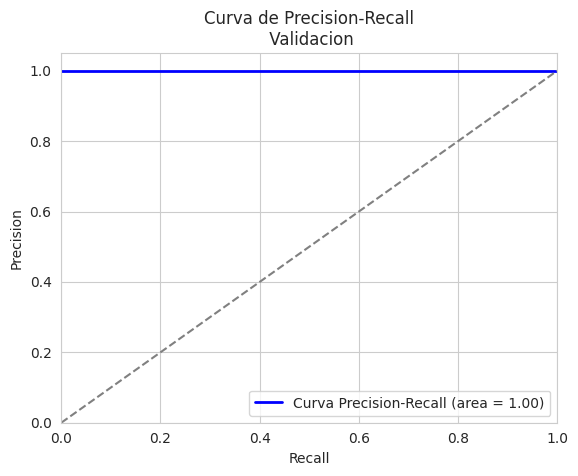

In [24]:
precision, recall, thresholds = precision_recall_curve(y_validation, y_pred_validation)

auc_pr = average_precision_score(y_validation, y_pred_validation)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label=f'Curva Precision-Recall (area = {auc_pr:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva de Precision-Recall\n Validacion')

plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.10/dist-packages/scikitplot/metrics.py:124: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


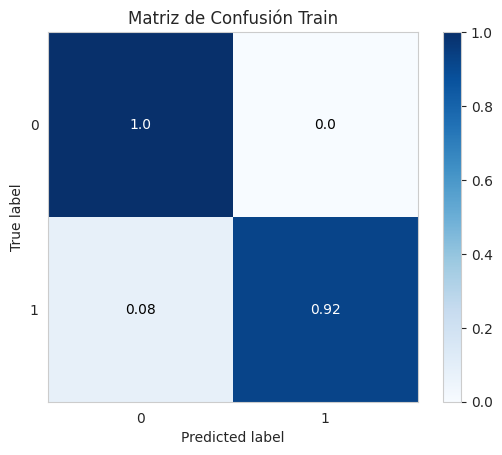

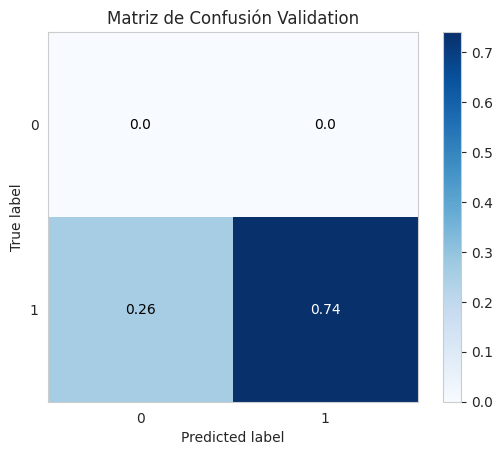

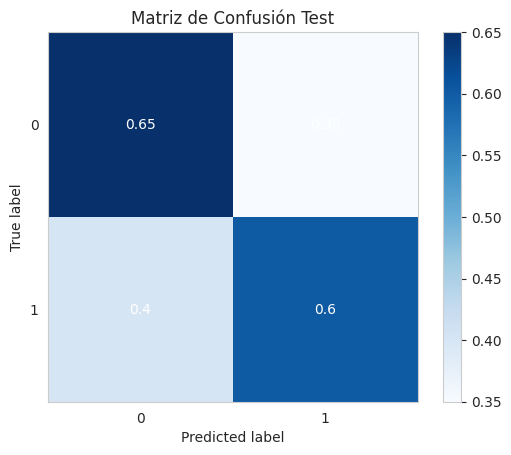

In [26]:
# Gráfico de Matriz de Confusión
skplt.metrics.plot_confusion_matrix(y_train, y_pred_train, normalize=True)
plt.title('Matriz de Confusión Train')

skplt.metrics.plot_confusion_matrix(y_validation, y_pred_validation, normalize=True)
plt.title('Matriz de Confusión Validation')

skplt.metrics.plot_confusion_matrix(y_test, y_pred_test, normalize=True)
plt.title('Matriz de Confusión Test')


plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


ValueError: Found input variables with inconsistent numbers of samples: [80, 160]

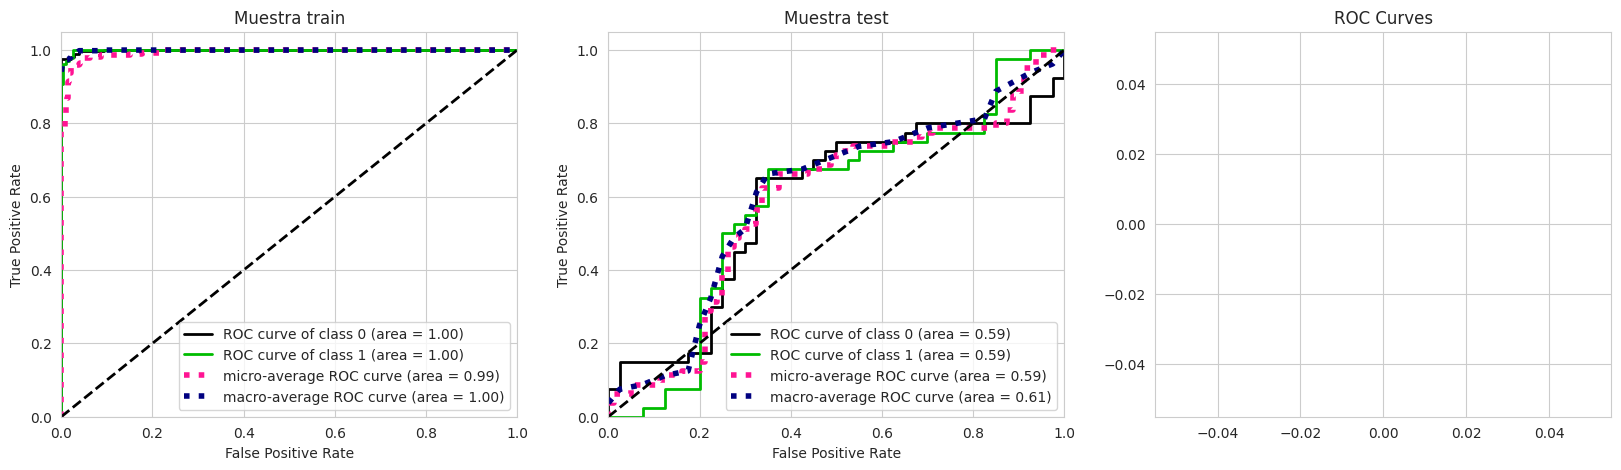

In [27]:
"""fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

skplt.metrics.plot_roc(y_train, np.column_stack((1-y_proba_train, y_proba_train)), ax=axes[0])
axes[0].set_title("Muestra train")

skplt.metrics.plot_roc(y_test, np.column_stack((1-y_proba_test, y_proba_test)), ax=axes[1])
axes[1].set_title("Muestra test")

skplt.metrics.plot_roc(y_validation, np.column_stack((1-y_proba_validation, y_proba_validation)), ax=axes[2])
axes[2].set_title("Muestra validation")
axes[2].legend(loc="lower right")
"""

###Pruebas de modelo (antes de exportar):

In [23]:
input_tensor = model.inputs
print(f"Tensor de entrada: {input_tensor}")

Tensor de entrada: [<KerasTensor shape=(None, 128, 128, 4), dtype=float32, sparse=None, name=keras_tensor>]


In [24]:
#Folder of images:
!ls '/Users/manuel/Documents/Python/project_mna/data/images_for_testing'

01.Page81.png 01.Page82.png 01.Page83.png


In [27]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Cargar la imagen
image_path = '/Users/manuel/Documents/Python/project_mna/data/images_for_testing/01.Page83.png'
image = plt.imread(image_path)
size = (128,128)
image = cv2.resize(img,size)

# Convertir la imagen a un array numpy y normalizar los valores de los píxeles
image_array = img_to_array(image)

# Agregar una dimensión extra para convertir la imagen en un lote de un solo elemento
image_array = tf.expand_dims(image_array, axis=0)

# Pasar la imagen al modelo para hacer una predicción
prediction = model.predict(image_array)

print("Value of prediction: ")
print(prediction)

#Give the result:
if(prediction > 0.5):
  print("The image is NOK")
else:
  print("The image is OK")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Value of prediction: 
[[0.54866916]]
The image is NOK


###Exportación del modelo:

In [28]:
import tensorflow as tf
import tensorflowjs as tfjs
import keras

# Print TensorFlow and Keras versions
print("TensorFlow version:", tf.__version__)
print("TensorFlow JS version:", tfjs.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.16.1
TensorFlow JS version: 4.20.0
Keras version: 3.3.3


In [29]:
tfjs.converters.save_keras_model(model, "model")

failed to lookup keras version from the file,
    this is likely a weight only file


In [30]:
!mkdir model_

In [31]:
!tensorflowjs_converter --input_format=keras model/model.h5 model_

failed to lookup keras version from the file,
    this is likely a weight only file


###Comprobación de exportación:

#### en *.h5

In [33]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

# Load the model
model_path = 'model/model.h5'  # Update this to the path where your model is saved
model = load_model(model_path)

# Print the model summary to check architecture
model.summary()

# Load your test data
# Note: Replace `x_test` and `y_test` with your actual test data
# x_test, y_test = load_your_test_data_function()  # Uncomment and define function to load your test data

# Make a prediction
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Cargar la imagen
image_path = '/Users/manuel/Documents/Python/project_mna/data/images_for_testing/01.Page83.png'
image = plt.imread(image_path)
size = (128,128)
image = cv2.resize(img,size)

# Convertir la imagen a un array numpy y normalizar los valores de los píxeles
image_array = img_to_array(image)

# Agregar una dimensión extra para convertir la imagen en un lote de un solo elemento
image_array = tf.expand_dims(image_array, axis=0)

# Pasar la imagen al modelo para hacer una predicción
prediction = model.predict(image_array)

print("\n \n Value of prediction: ")
print(prediction)

#Give the result:
if(prediction > 0.5):
  print("The image is NOK")
else:
  print("The image is OK")


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 829,235 (3.16 MB)

 Trainable params: 829,233 (3.16 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step

 
 Value of prediction: 
[[0.54866916]]
The image is NOK


#### en *.json

In [35]:
import json

# Load the model in TensorFlow.js format
model_path = 'model_/model.json'

# Load the model from the JSON file path
model = tfjs.converters.load_keras_model(model_path)  # Pass the file path

# View the model structure
model.summary()

# Explore the details of the model layers
for layer in model.layers:
    print(f"Layer Name: {layer.name}")
    print(f"Layer Type: {type(layer).__name__}")
    print(f"Output Shape: {layer.output_shape}")
    print(f"Number of Parameters: {layer.count_params()}")
    print("-" * 40)

TypeError: Error when deserializing class 'InputLayer' using config={'batch_shape': [None, 128, 128, 4], 'dtype': 'float32', 'sparse': False, 'name': 'input_layer'}.

Exception encountered: Unrecognized keyword arguments: ['batch_shape']